In [3]:
import collections
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [4]:
# read in data
data = pd.read_csv('NewYork.csv')

In [5]:
# Describe the data
data.describe()
# print(list(data.columns))

,id,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,price,guests_included,minimum_nights,maximum_nights,availability_30,number_of_reviews,review_scores_rating,reviews_per_month
count,4.431700e+04,44317.000000,44317.000000,44317.000000,44173.000000,44244.000000,44226.000000,549.000000,44317.000000,44317.000000,44317.000000,4.431700e+04,44317.000000,44317.000000,34218.000000,34843.000000
mean,1.149792e+07,40.730049,-73.954700,2.813255,1.132739,1.158892,1.555895,727.732240,147.675948,1.482388,4.008665,6.421371e+04,5.904484,18.145836,93.487492,1.446368
std,6.494719e+06,0.053905,0.042382,1.853114,0.412206,0.721120,1.071849,633.253518,209.138888,1.090597,12.574811,1.049199e+07,9.099126,33.066623,8.209607,1.638707
min,2.515000e+03,40.499794,-74.253269,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000e+00,0.000000,0.000000,20.000000,0.010000
25%,6.029332e+06,40.691219,-73.983490,2.000000,1.000000,1.000000,1.000000,325.000000,70.000000,1.000000,1.000000,2.900000e+01,0.000000,1.000000,90.000000,0.270000
50%,1.226806e+07,40.723624,-73.956728,2.000000,1.000000,1.000000,1.000000,700.000000,105.000000,1.000000,2.000000,1.125000e+03,0.000000,5.000000,96.000000,0.870000
75%,1.736896e+07,40.764029,-73.939366,4.000000,1.000000,1.000000,2.000000,925.000000,175.000000,2.000000,4.000000,1.125000e+03,9.000000,20.000000,100.000000,2.100000
max,2.117803e+07,40.909174,-73.710126,16.000000,15.500000,14.000000,40.000000,5000.000000,10000.000000,16.000000,1250.000000,2.147484e+09,30.000000,489.000000,100.000000,24.530000


# Data cleansing

(-1.1019296620684242,
 1.1089713385687547,
 -1.1215025656294224,
 1.1010239316966393)

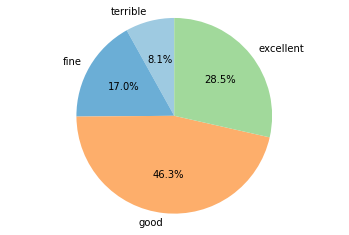

In [6]:
# pie
tmp  = data['review_scores_rating']
not_nan = tmp[tmp>0]
labels = 'terrible','fine','good','excellent'
terrible = len(tmp[tmp<=80])  # rate<=80
fine = len(tmp[tmp<=90])-terrible # 80 < rate <= 90
good = len(tmp[tmp<100]) - terrible - fine # 95 < rate < 100
excellent = len(tmp[tmp==100]) # rate = 100
sizes = [terrible, fine, good, excellent]
cmap = plt.get_cmap("tab20c")
colors = cmap(np.array([2, 1,6,10]))
fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct = '%1.1f%%',shadow=False, startangle = 90,colors = colors)
ax1.axis('equal')

In [7]:
data.keys()
data

,id,host_response_time,host_response_rate,host_is_superhost,host_has_profile_pic,neighbourhood_cleansed,latitude,longitude,is_location_exact,property_type,...,maximum_nights,calendar_updated,availability_30,number_of_reviews,review_scores_rating,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,reviews_per_month
0,18461891,NaN,NaN,f,t,Ditmars Steinway,40.774142,-73.916246,t,Apartment,...,6,5 months ago,0,0,NaN,f,f,strict,f,NaN
1,20702398,within an hour,100%,f,t,City Island,40.849191,-73.786509,f,House,...,21,2 weeks ago,19,2,100.0,f,f,moderate,f,2.00
2,6627449,within an hour,100%,f,t,City Island,40.849775,-73.786609,t,Apartment,...,21,2 weeks ago,28,21,95.0,f,f,strict,f,0.77
3,19949243,within a few hours,100%,f,t,City Island,40.848838,-73.782276,f,Boat,...,1125,6 days ago,30,0,NaN,t,f,strict,f,NaN
4,1886820,NaN,NaN,f,t,City Island,40.841144,-73.783052,t,House,...,90,16 months ago,30,0,NaN,f,f,strict,f,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44312,20530309,within an hour,90%,f,t,Flatlands,40.618675,-73.932736,f,Apartment,...,1125,2 weeks ago,30,1,100.0,t,f,flexible,f,0.81
44313,20459907,within a few hours,100%,f,t,Bushwick,40.684681,-73.905174,t,Apartment,...,30,2 weeks ago,4,0,NaN,t,f,strict,f,NaN
44314,4287386,within an hour,100%,f,t,Rockaway Beach,40.583865,-73.819245,f,Apartment,...,60,2 weeks ago,1,6,87.0,f,f,moderate,f,3.91
44315,20939747,within an hour,100%,f,t,Rosedale,40.679998,-73.720787,f,Apartment,...,1125,a week ago,7,0,NaN,f,f,strict,f,NaN


21837 21837


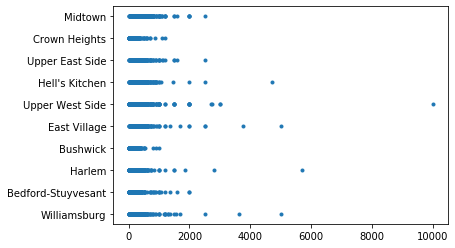

In [6]:
regions = collections.Counter(data['neighbourhood_cleansed'])
sort_r = sorted(regions.items(), key = lambda x: x[1],reverse = True)[:10]
x_plt = []
y_plt = []
for i in range(len(sort_r)):
    price = data['price']
    regs = data['neighbourhood_cleansed']
    idxs = [regs==sort_r[i]]
    s= list(price[regs == sort_r[i][0]])
    x_plt += s
    y_plt += [sort_r[i][0]]*len(s)

print(len(x_plt),len(y_plt))
plt.plot(x_plt,y_plt,".")

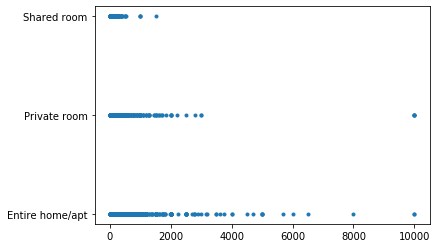

In [7]:
beds = data['room_type']
price = data['price']
plt.plot(price,beds,".")

# PCA using one HOT encoding

In [8]:
new_data = data[['price',
           'room_type',
           'accommodates',
           'review_scores_rating',
           'neighbourhood_cleansed']]
new_data = new_data[tmp>0]

In [9]:
lb_nh = LabelEncoder() # neighbour
lb_rt = LabelEncoder()  # room type
lb_ac = LabelEncoder() # accommodates
lb_rr = LabelEncoder() # review score rating

In [10]:
oh_neighborhood = pd.get_dummies(new_data.neighbourhood_cleansed).astype(int)
oh_room_type = pd.get_dummies(new_data.room_type).astype(int)
oh_accommodates = pd.get_dummies(new_data.accommodates).astype(int)
oh_review_scores_rating = pd.get_dummies(new_data.review_scores_rating).astype(int)

In [11]:
le_neighborhood = lb_nh.fit_transform(new_data["neighbourhood_cleansed"])
le_room_type = lb_rt.fit_transform(new_data['room_type'])
le_accommodates =  lb_rt.fit_transform(new_data['accommodates'])
le__review_scores_rating =  lb_rt.fit_transform(new_data['review_scores_rating'])

In [12]:
new_data = new_data.drop(['room_type','neighbourhood_cleansed','accommodates','review_scores_rating'], axis = 1)
le_data = pd.DataFrame(new_data)

In [13]:
le_neighborhood = pd.DataFrame(le_neighborhood)
le_room_type = pd.DataFrame(le_room_type)
le_accommodates = pd.DataFrame(le_accommodates)
le__review_scores_rating = pd.DataFrame(le__review_scores_rating)

In [14]:
le_data = pd.concat((new_data, le_room_type, le_neighborhood,le_accommodates,le__review_scores_rating), axis = 1)

In [15]:
le_data.columns = ['price',
           'room_type',
           'accommodates',
           'review_scores_rating',
           'neighbourhood_cleansed']
le_data = le_data[tmp>0]

C:\Apps\anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [16]:
new_data = pd.concat((new_data, oh_room_type, oh_neighborhood,oh_accommodates,oh_review_scores_rating), axis = 1)

In [18]:
le_data = le_data.dropna(axis=0, how='any')

In [19]:
new_data = new_data[:le_data.shape[0]]

In [25]:
new_data.head()
new_data.to_csv("output.csv")

In [26]:
le_data.head()

,price,room_type,accommodates,review_scores_rating,neighbourhood_cleansed
1,50.0,0.0,33.0,2.0,45.0
2,125.0,1.0,33.0,3.0,47.0
5,69.0,0.0,33.0,1.0,47.0
6,150.0,0.0,33.0,1.0,49.0
7,101.0,0.0,33.0,3.0,37.0


In [27]:
y = new_data['price']
X = new_data.drop(['price'],axis=1)

In [28]:
X_std = StandardScaler().fit_transform(X)

In [29]:
pca = PCA(n_components = 30)

In [30]:
pca.fit(X_std)

PCA(copy=True, iterated_power='auto', n_components=30, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [132]:
print('Components:\n ', pca.components_)
print('Explained Variance Ratio:\n ', pca.explained_variance_ratio_)

Components:
  [[ 0.56882401 -0.55787517 -0.03877282 ...  0.0104612   0.01173609
  -0.03658751]
 [-0.09318486  0.00632529  0.28064613 ... -0.05027515 -0.0584203
   0.11362305]
 [ 0.06930489 -0.05449015 -0.04819258 ... -0.08170919 -0.07456746
   0.68524868]
 ...
 [-0.00175001 -0.00148068  0.010428   ... -0.05565171  0.01138709
  -0.00652182]
 [-0.00936961  0.00886196  0.00169405 ...  0.05822792  0.00540715
  -0.00799385]
 [ 0.00707457  0.00137008 -0.02727283 ...  0.0401469   0.01059509
  -0.00134091]]
Explained Variance Ratio:
  [0.01049535 0.00577208 0.00511449 0.00447475 0.00440411 0.00436534
 0.00434308 0.00428944 0.00426857 0.00422517 0.00419477 0.00417717
 0.00415408 0.00414091 0.0041244  0.00411953 0.00407084 0.00406079
 0.00405333 0.00404633 0.00402984 0.00401241 0.00400448 0.00400171
 0.00399035 0.00397855 0.00397596 0.00396774 0.00396174 0.00394318]


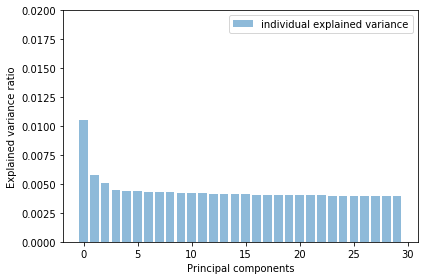

In [133]:
#plot explained variance 
plt.bar(range(pca.explained_variance_ratio_.shape[0]), pca.explained_variance_ratio_, alpha = 0.5, 
        align = 'center', label = 'individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.ylim(0, 0.02)
plt.legend(loc = 'best')
plt.tight_layout()

In [134]:
y = le_data['price']
X = le_data.drop(['price'],axis=1)
#standarize the dataset
X_std = StandardScaler().fit_transform(X)

# call PCA specifying we only want the

pca = PCA(n_components =4)
pca.fit(X_std)

# important information
print('Components:\n ', pca.components_)
print('Explained Variance Ratio:\n ', pca.explained_variance_ratio_)

Components:
  [[-0.70925029  0.06862287  0.70086701  0.03225457]
 [ 0.06115502 -0.67503154  0.16099556 -0.71740708]
 [ 0.02279235  0.72711395 -0.01656023 -0.68593846]
 [ 0.7019292   0.10454007  0.69468815  0.11736762]]
Explained Variance Ratio:
  [0.36656383 0.2577813  0.24471639 0.13093849]


In [135]:
s1 = sum(pca.explained_variance_ratio_[:3])
s2 = sum(pca.explained_variance_ratio_[3:])

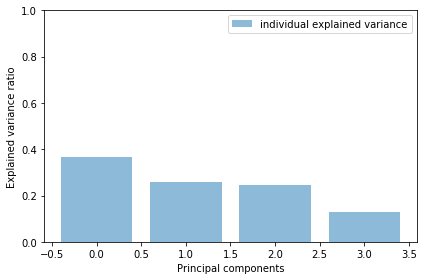

In [136]:
plt.bar(range(pca.explained_variance_ratio_.shape[0]), pca.explained_variance_ratio_, alpha = 0.5, 
        align = 'center', label = 'individual explained variance')

plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.ylim(0, 1)
plt.legend(loc = 'best')
plt.tight_layout()